In [1]:
##  тема - NLP


In [2]:
# utils
import time
import nltk
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
from textblob import TextBlob
import re
# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, accuracy_score, roc_curve,recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# metrics
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [3]:
#This file consists of the text made with #Bitcoin & #btc hashtag
df = pd.read_csv("Bit_tw.csv")

df.dropna(subset=['hashtags'], inplace=True)

text_df = df[['text']] 
text_df.columns = ['tweets']
text_df.head()

,tweets
0,Blue Ridge Bank shares halted by NYSE after #b...
1,"😎 Today, that's this #Thursday, we will do a ""..."
3,$BTC A big chance in a billion! Price: \487264...
4,This network is secured by 9 508 nodes as of t...
5,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...


In [5]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False


In [6]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

nltk.download('wordnet')#Представляет собой электронный словарь-тезаурус и набор семантических сетей для английского языка.
nltk.download('stopwords')#  электронный словарь "пустых" слов
nltk.download('punkt')
# Лемматизация — это процесс преобразования слова в его базовую форму.
# токенизация - разбиение текста на слова ( и не-слова, те знаки препинания, границы абзацев и т.п) 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\UserOne\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\UserOne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\UserOne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
stop_words = nltk.corpus.stopwords.words(['english'])

lem = WordNetLemmatizer() # Init the Wordnet Lemmatizer

def cleaning(data): 
  #remove urls
  tweet_without_url = re.sub(r'http\S+',' ', data)

  #remove hashtags
  tweet_without_hashtag = re.sub(r'#\w+', ' ', tweet_without_url)

  #3. Remove mentions and characters that not in the English alphabets
  tweet_without_mentions = re.sub(r'@\w+',' ', tweet_without_hashtag)
  precleaned_tweet = re.sub('[^A-Za-z]+', ' ', tweet_without_mentions)

    #2. Tokenize (разбивка предложения на "слова")
  tweet_tokens = TweetTokenizer().tokenize(precleaned_tweet)
    
    #3. Remove Puncs
  tokens_without_punc = [w for w in tweet_tokens if w.isalpha()]
    
    #4. Removing Stopwords (оставляем только основу смысла предложения)
  tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]    
    #6. Joining
  return " ".join(tokens_without_sw)

def lemmatization(data): 
    #1. Tokenize (разбивка предложения на "слова")
    tweet_tokens = TweetTokenizer().tokenize(data)
    #2 lemma (придание словам первоначальной формы)
    text_cleaned = [lem.lemmatize(t) for t in tweet_tokens]
    #6. Joining
    return " ".join(text_cleaned)

In [8]:
# применение фильтров
# датафрейм text_df теперь содержит 3 версии текстов: исходный, очищенный, очищенный + лемматизированный
text_df['cleaned_tweets'] = text_df['tweets'].apply(cleaning)
text_df['cleaned_and_lem_tweets'] = text_df['cleaned_tweets'].apply(lemmatization)
text_df.head(10)

,tweets,cleaned_tweets,cleaned_and_lem_tweets
0,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank shares halted NYSE ATM announc...,Blue Ridge Bank share halted NYSE ATM announce...
1,"😎 Today, that's this #Thursday, we will do a ""...",Today Take friend expe,Today Take friend expe
3,$BTC A big chance in a billion! Price: \487264...,BTC A big chance billion Price,BTC A big chance billion Price
4,This network is secured by 9 508 nodes as of t...,This network secured nodes today Soon biggest ...,This network secured node today Soon biggest b...
5,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,Trade Enjoy Trading fee Sign link,Trade Enjoy Trading fee Sign link
6,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,lt fire amp man gt,lt fire amp man gt
8,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,RSR I know told guys target know,RSR I know told guy target know
9,.@Tesla’s #bitcoin investment is revolutionary...,investment revolutionary firms may yet,investment revolutionary firm may yet
10,Annnd #btc #Bitcoin is headed even higher now....,Annnd headed even higher,Annnd headed even higher
13,#Bitcoin #BTC $BTC $GBTC $RIOT $MARA $ETH $ETH...,BTC GBTC RIOT MARA ETH ETHE AAVE COMP CGLD GRT...,BTC GBTC RIOT MARA ETH ETHE AAVE COMP CGLD GRT...


In [9]:
# функции для генерации значении для дальнейшего создания меток класса 
def getSubjectivity(tweet):
  return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
  return TextBlob(tweet).sentiment.polarity

In [10]:
text_df['subjectivity'] = text_df['cleaned_tweets'].apply(getSubjectivity)
text_df['polarity'] = text_df['cleaned_tweets'].apply(getPolarity)


In [11]:
text_df.head(5)

,tweets,cleaned_tweets,cleaned_and_lem_tweets,subjectivity,polarity
0,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank shares halted NYSE ATM announc...,Blue Ridge Bank share halted NYSE ATM announce...,0.1,0.00
1,"😎 Today, that's this #Thursday, we will do a ""...",Today Take friend expe,Today Take friend expe,0.0,0.00
3,$BTC A big chance in a billion! Price: \487264...,BTC A big chance billion Price,BTC A big chance billion Price,0.1,0.00
4,This network is secured by 9 508 nodes as of t...,This network secured nodes today Soon biggest ...,This network secured node today Soon biggest b...,0.2,-0.25
5,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,Trade Enjoy Trading fee Sign link,Trade Enjoy Trading fee Sign link,0.5,0.40


In [12]:
# для бинаризации класса 'polarity'
def getSentiment(score):
  if score < 0:
    return 'negative'
  elif score == 0:
    return 'neutral'
  else:
    return 'positive'

In [13]:
text_df['sentiment'] = text_df['polarity'].apply(getSentiment)
text_df.head()

,tweets,cleaned_tweets,cleaned_and_lem_tweets,subjectivity,polarity,sentiment
0,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank shares halted NYSE ATM announc...,Blue Ridge Bank share halted NYSE ATM announce...,0.1,0.00,neutral
1,"😎 Today, that's this #Thursday, we will do a ""...",Today Take friend expe,Today Take friend expe,0.0,0.00,neutral
3,$BTC A big chance in a billion! Price: \487264...,BTC A big chance billion Price,BTC A big chance billion Price,0.1,0.00,neutral
4,This network is secured by 9 508 nodes as of t...,This network secured nodes today Soon biggest ...,This network secured node today Soon biggest b...,0.2,-0.25,negative
5,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,Trade Enjoy Trading fee Sign link,Trade Enjoy Trading fee Sign link,0.5,0.40,positive


num_classes:  3


In [14]:
import sklearn.feature_extraction.text

tfidf_vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(
    max_df = 0.8,
    max_features = 500,
    min_df = 0.002,
    #stop_words = ruen_stopwords + ['http'],
    use_idf = True,
    #token_pattern = '[a-zA-Zа-яА-Я_]{2,}',
    ngram_range = (1,3)
)

%time tfidf_matrix = tfidf_vectorizer.fit_transform( text_df['cleaned_and_lem_tweets']  )
tfidf_matrix.shape

Wall time: 4.82 s


(89897, 500)

In [15]:
# категоризация 
X1 = tfidf_matrix 
Y1 = text_df['sentiment'].values # pd.get_dummies(text_df['sentiment']).values бинарное кодирование
strat = pd.get_dummies(text_df['sentiment']).values
num_classes = text_df['sentiment'].nunique()
print('num_classes: ', num_classes)

num_classes:  3


In [16]:
strat

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [18]:
start_exec_time = time.time()
seed = 101 # для воспроизводимости результата
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, 
                                                    test_size=0.2,
                                                    stratify=strat,
                                                    random_state=seed)
print("Time of execution:",time.time() - start_exec_time)
print("Shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Time of execution: 0.5517580509185791
Shapes: (71917, 500) (17980, 500) (71917,) (17980,)


In [19]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')#KNeighborsClassifier()
clf.fit(X_train, y_train )
print('ok')

ok


In [20]:
#X_train = X_train.astype(np.float32)
#X_test = X_test.astype(np.float32)

In [20]:
# classification
start_exec_time = time.time()
y_pred = clf.predict( X_test )
print('Accuracy score',accuracy_score( y_test, y_pred ))
print("Time of execution:",time.time() - start_exec_time)

Accuracy score 0.7130144605116796
Time of execution: 65.9575126171112


In [45]:
# поиск гипер параметров

start_exec_time = time.time()
#del X_train, X_test, y_train, y_test

seed = 101 # для воспроизводимости результата
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(text_df['cleaned_and_lem_tweets'], Y1, 
                                                    test_size=0.2,
                                                    stratify=strat,
                                                    random_state=seed)

model = KNeighborsClassifier()
# определяем конвейер
pipe = Pipeline(steps=[('TfidfVectorizer', sklearn.feature_extraction.text.TfidfVectorizer()), ('SVC', SVC())])
#print(pipe.get_params().keys())
# определяем диапазон параметров для поиска
grid_params = [
    {'TfidfVectorizer__max_features': list(range(500,1600,500)),
     'TfidfVectorizer__max_df': np.linspace(0.5,1,3),
     'TfidfVectorizer__min_df':  np.linspace(0.001,0.01,2) } 
]

g_search = GridSearchCV(
    estimator=pipe,
    param_grid=grid_params,
    scoring='precision_micro', # search as that we get minimum of 1 type error
    cv=3, # cross validation
    n_jobs=3 # multi thread
)

_ = g_search.fit(X_train, y_train) # запуск поиска оптимальных параметров
print("Time of execution:",time.time() - start_exec_time)

Time of execution: 20255.081000089645


In [46]:

print("Best parameter (CV score=%0.3f):" % g_search.best_score_)
print(g_search.best_params_)

Best parameter (CV score=0.928):
{'TfidfVectorizer__max_df': 0.5, 'TfidfVectorizer__max_features': 1500, 'TfidfVectorizer__min_df': 0.001}


In [56]:
start_exec_time = time.time()
# демонстрация работы классификатора на оптимальных параметрах
X_train, X_test, y_train, y_test = train_test_split(text_df['cleaned_and_lem_tweets'], Y1, 
                                                    test_size=0.2,
                                                    stratify=strat,
                                                    random_state=seed)

pipe = Pipeline(steps=[('TfidfVectorizer', sklearn.feature_extraction.text.TfidfVectorizer(
     max_features = g_search.best_params_['TfidfVectorizer__max_features'],
     max_df = g_search.best_params_['TfidfVectorizer__max_df'],
     min_df = g_search.best_params_['TfidfVectorizer__min_df'] )), ('SVC', SVC(C = 1.5))])
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print("Accuracy score:",accuracy_score(y_test, pred))
print("precision score:",precision_score(y_test, pred, average = "micro"))
print("Time of execution:",time.time() - start_exec_time)

Accuracy score: 0.9312569521690768
precision score: 0.9312569521690768
Time of execution: 1272.8991649150848


In [57]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    negative       0.93      0.72      0.81      1974
     neutral       0.91      0.99      0.95      9040
    positive       0.96      0.92      0.94      6966

    accuracy                           0.93     17980
   macro avg       0.93      0.87      0.90     17980
weighted avg       0.93      0.93      0.93     17980



In [ ]:
## Подводим итоги: параметры наилучшей модели и получившиеся при них метрики классификации.
#ВЫВОДЫ локалнооптимальные параметры модели SVM следующие:
#Best parameter (CV score=0.93):
#{'TfidfVectorizer__max_df': 0.5, 'TfidfVectorizer__max_features': 500, 'TfidfVectorizer__min_df': 0.001}
# По факту, модель нужно тестировать на дастаточно широком диапазонепараметров

In [ ]:
## Строим confusion matrix (см. ЛР4) для оценки того, какие ошибки классификатор допускает наиболее часто.

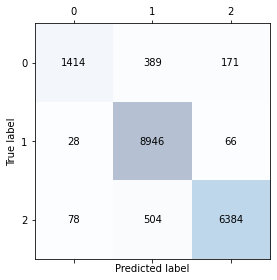

In [58]:
#confusion matrix
confmat = confusion_matrix(y_test, pred)

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.tight_layout()